## Find group of customers based on their estimated salary and balance

Import libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Import dataset
dataset=pd.read_csv('Churn_Modelling.csv')

In [26]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Extract Balance and EstimatedSalary columns


In [27]:
X = dataset.iloc[:,[8,12]].values
X

array([[     0.  , 101348.88],
       [ 83807.86, 112542.58],
       [159660.8 , 113931.57],
       ...,
       [     0.  ,  42085.58],
       [ 75075.31,  92888.52],
       [130142.79,  38190.78]])

## Elbow Method - Determine the optimal number of clusters
- Let's consider 15 clusters
- Create a kmeans object with kmeans parameters n_clusters, init, and random_state. Definitions below. 

<b>Parameters:</b>
- Parameter n_clusters :
    - int, optional, default: 8 - The number of clusters to form as well as the number of centroids to generate.

- Parameter init:
    - ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    - ‘random’: choose k observations (rows) at random from data for the initial centroids.
    - If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
- Parameter random_state : int, RandomState instance or None (default)
    - Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.

<b>Attributes</b>:
- inertia_:float
    - Sum of squared distances of samples to their closest cluster center.


        

In [28]:
wcss = [] # sum of squared distances
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X) # Fit the model to extract sum of squared distances
    wcss.append(kmeans.inertia_)

## Visualization of the Elbow Method

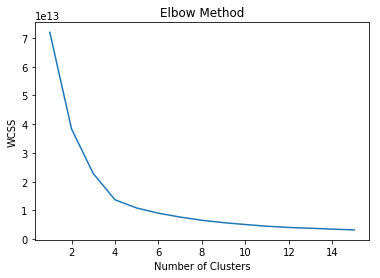

In [29]:
plot.plot(range(1,16),wcss)
plot.title('Elbow Method')
plot.xlabel('Number of Clusters')
plot.ylabel('WCSS')
plot.show()

- The optimal number of clusters is 4. 
- Apply the optimal number of 4 clusters to K-Means Clustering.

## K-Means Clustering

In [30]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

- Compute cluster centers and predict cluster index for each sample.

In [31]:
y = kmeans.fit_predict(X)
print(y)

[3 1 1 ... 2 0 0]


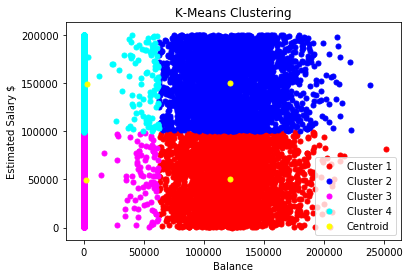

In [35]:
plot.scatter(X[y == 0,0], X[y==0,1], s=25 , c='red', label='Cluster 1')
plot.scatter(X[y == 1,0], X[y==1,1], s=25 , c='blue', label='Cluster 2')
plot.scatter(X[y == 2,0], X[y==2,1], s=25 , c='magenta', label='Cluster 3')
plot.scatter(X[y == 3,0], X[y==3,1], s=25 , c='cyan', label='Cluster 4')

plot.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=25, c='yellow',label='Centroid')
plot.title('K-Means Clustering')
plot.xlabel('Balance')
plot.ylabel('Estimated Salary $')
plot.legend()
plot.show()

## Cluster Analysis
Large number of customers are located in clusters 1 and 2 compared to clusters 3 and 4.
- <b>Cluster 1</b>: Medium estimated salary and high balance, with an average balance of $ 50,000.00 and average estimated salary of $150,000.00 
- <b>Cluster 2</b>: High estimated salary and high balance, with an average balance of $ 125,000.00 and average estimated salary of $150,000.00 
- <b>Cluster 3</b>: Low estimated salary and low balance
- <b>Cluster 4</b>: High estimated salary, but low balance